In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0202/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 447 ms, sys: 15.4 ms, total: 463 ms
Wall time: 465 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.009310,0.0,0.011365,0.0,-0.029393,3.456822e-02,-0.007402,0.668349,0.043261,...,0.0,-0.004518,0.0,-0.003136,0.0,-0.011389,0.0,0.018781,0.0,-0.016691
1,0.0,-0.007601,0.0,0.003203,0.0,-0.021079,0.000000e+00,0.005239,0.000000,0.038788,...,0.0,-0.002360,0.0,-0.006732,0.0,-0.004313,0.0,-0.007847,0.0,-0.010245
2,0.0,-0.010790,0.0,-0.000529,0.0,-0.025511,0.000000e+00,-0.003280,0.019771,0.040083,...,0.0,-0.003425,0.0,-0.010097,0.0,-0.011670,0.0,-0.006169,0.0,0.017415
3,0.0,-0.003466,0.0,0.009428,0.0,-0.008220,5.677393e-07,-0.000443,0.000004,0.042489,...,0.0,-0.005560,0.0,-0.000440,0.0,-0.011229,0.0,0.000549,0.0,-0.003220
4,0.0,-0.000729,0.0,-0.001791,0.0,-0.000274,1.649071e-03,-0.002393,0.000865,0.040596,...,0.0,-0.003933,0.0,-0.001200,0.0,-0.006345,0.0,0.008322,0.0,0.009772


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,3.456822e-02,0.668349,1.248073e-05,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.019771,6.234838e-01,0.000027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.677393e-07,0.000004,2.414957e-12,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.649071e-03,0.000865,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,3.517265e-02,0.951013,1.248081e-05,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000e+00,0.019968,8.654154e-01,0.000027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.677395e-07,0.000004,2.414957e-12,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.650432e-03,0.000866,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    17.999960
1    21.000000
2    23.000000
3    20.999982
4    21.000000
5    18.000000
6    18.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 148 ms, sys: 43.7 ms, total: 192 ms
Wall time: 192 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.009137  , -0.00742497, -0.01065171, -0.00332683, -0.00065742,
        0.00238032,  0.00238013], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    12.138183
1    12.811199
2    12.852798
3    15.233723
4    11.804302
5    17.754623
6    15.424938
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0202_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0202_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0202_true_and_forecasted_values_df

,True_count,Forecasted_count
0,17.999960,12.138183
1,21.000000,12.811199
2,23.000000,12.852798
3,20.999982,15.233723
4,21.000000,11.804302
5,18.000000,17.754623
6,18.000000,15.424938


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

6.854449553299706

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

5.997167952548975

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.4661818601345289, pvalue=0.29170142626520096)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-12.703445759312816

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 220 ms, sys: 73.6 ms, total: 293 ms
Wall time: 294 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-1.1391431e-02, -3.7773401e-03, -1.0694906e-02, ...,
         8.1396401e-03,  2.3017824e-03,  4.3539703e-03],
       [-9.7470880e-03, -3.7740767e-03, -1.0529667e-02, ...,
         6.8573356e-03,  4.1773021e-03,  4.7078580e-03],
       [-1.0444805e-02, -4.3103546e-03, -9.9914372e-03, ...,
         7.1676373e-03,  2.2188574e-03,  3.9698780e-03],
       ...,
       [-6.3488185e-03, -8.6700469e-03, -1.0098934e-02, ...,
        -4.2579770e-03,  4.5001507e-05,  6.4402819e-04],
       [-6.3247979e-03, -7.5833499e-03, -9.4715804e-03, ...,
        -2.4206340e-03,  6.7026913e-04,  1.3011247e-03],
       [-5.0225705e-03, -7.7722967e-03, -9.0393722e-03, ...,
        -3.0415952e-03,  1.6223192e-03,  2.5246441e-03]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-1.1391431e-02, -3.7773401e-03, -1.0694906e-02, ...,
         8.1396401e-03,  2.3017824e-03,  4.3539703e-03],
       [-9.7470880e-03, -3.7740767e-03, -1.0529667e-02, ...,
         6.8573356e-03,  4.1773021e-03,  4.7078580e-03],
       [-1.0444805e-02, -4.3103546e-03, -9.9914372e-03, ...,
         7.1676373e-03,  2.2188574e-03,  3.9698780e-03],
       ...,
       [-6.3488185e-03, -8.6700469e-03, -1.0098934e-02, ...,
        -4.2579770e-03,  4.5001507e-05,  6.4402819e-04],
       [-6.3247979e-03, -7.5833499e-03, -9.4715804e-03, ...,
        -2.4206340e-03,  6.7026913e-04,  1.3011247e-03],
       [-5.0225705e-03, -7.7722967e-03, -9.0393722e-03, ...,
        -3.0415952e-03,  1.6223192e-03,  2.5246441e-03]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[18.13981  , 19.940998 , 20.81351  , ..., 11.266947 , 14.476682 ,
        11.838214 ],
       [17.166811 , 12.762994 , 16.019384 , ..., 11.634166 , 17.899792 ,
        20.27536  ],
       [22.41477  , 17.417309 , 14.953669 , ..., 13.944078 , 20.119764 ,
        15.048614 ],
       ...,
       [13.6187   , 16.196373 , 16.27297  , ..., 22.714396 , 24.723228 ,
        26.050138 ],
       [17.990974 , 18.26886  , 24.00779  , ..., 28.907137 , 26.469025 ,
        26.383717 ],
       [13.6978035, 18.803831 , 23.303022 , ..., 22.868057 , 27.386328 ,
        22.811691 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[18.13981  , 19.940998 , 20.81351  , ..., 11.266947 , 14.476682 ,
        11.838214 ],
       [17.166811 , 12.762994 , 16.019384 , ..., 11.634166 , 17.899792 ,
        20.27536  ],
       [22.41477  , 17.417309 , 14.953669 , ..., 13.944078 , 20.119764 ,
        15.048614 ],
       ...,
       [13.6187   , 16.196373 , 16.27297  , ..., 22.714396 , 24.723228 ,
        26.050138 ],
       [17.990974 , 18.26886  , 24.00779  , ..., 28.907137 , 26.469025 ,
        26.383717 ],
       [13.6978035, 18.803831 , 23.303022 , ..., 22.868057 , 27.386328 ,
        22.811691 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[2.40269995],
       [3.04522222],
       [3.37489154],
       [4.15134071],
       [0.78861032],
       [7.46999776],
       [6.26120888]])

In [63]:
ui_train

array([[22.72202353],
       [22.998315  ],
       [22.47829094],
       [25.40719714],
       [22.71742411],
       [28.23795753],
       [25.66286941]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

20.390015182537688

In [66]:
y_traina = block_0202_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[17.99996032],
       [21.00000011],
       [22.99999958],
       [20.99998231],
       [21.00000003],
       [17.99999995],
       [18.00000018]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([12.13819  , 12.811208 , 12.852799 , 15.233725 , 11.8042965,
       17.754614 , 15.424937 ], dtype=float32)

In [71]:
sum_forecasted_values

0    12.138183
1    12.811199
2    12.852798
3    15.233723
4    11.804302
5    17.754623
6    15.424938
dtype: float32

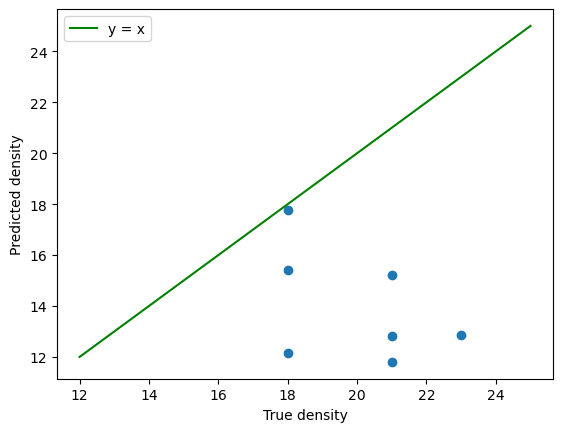

In [72]:
plt.scatter(block_0202_true_and_forecasted_values_df['True_count'], block_0202_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([12, 25], [12, 25], color='green', label='y = x')
plt.legend()
plt.show()

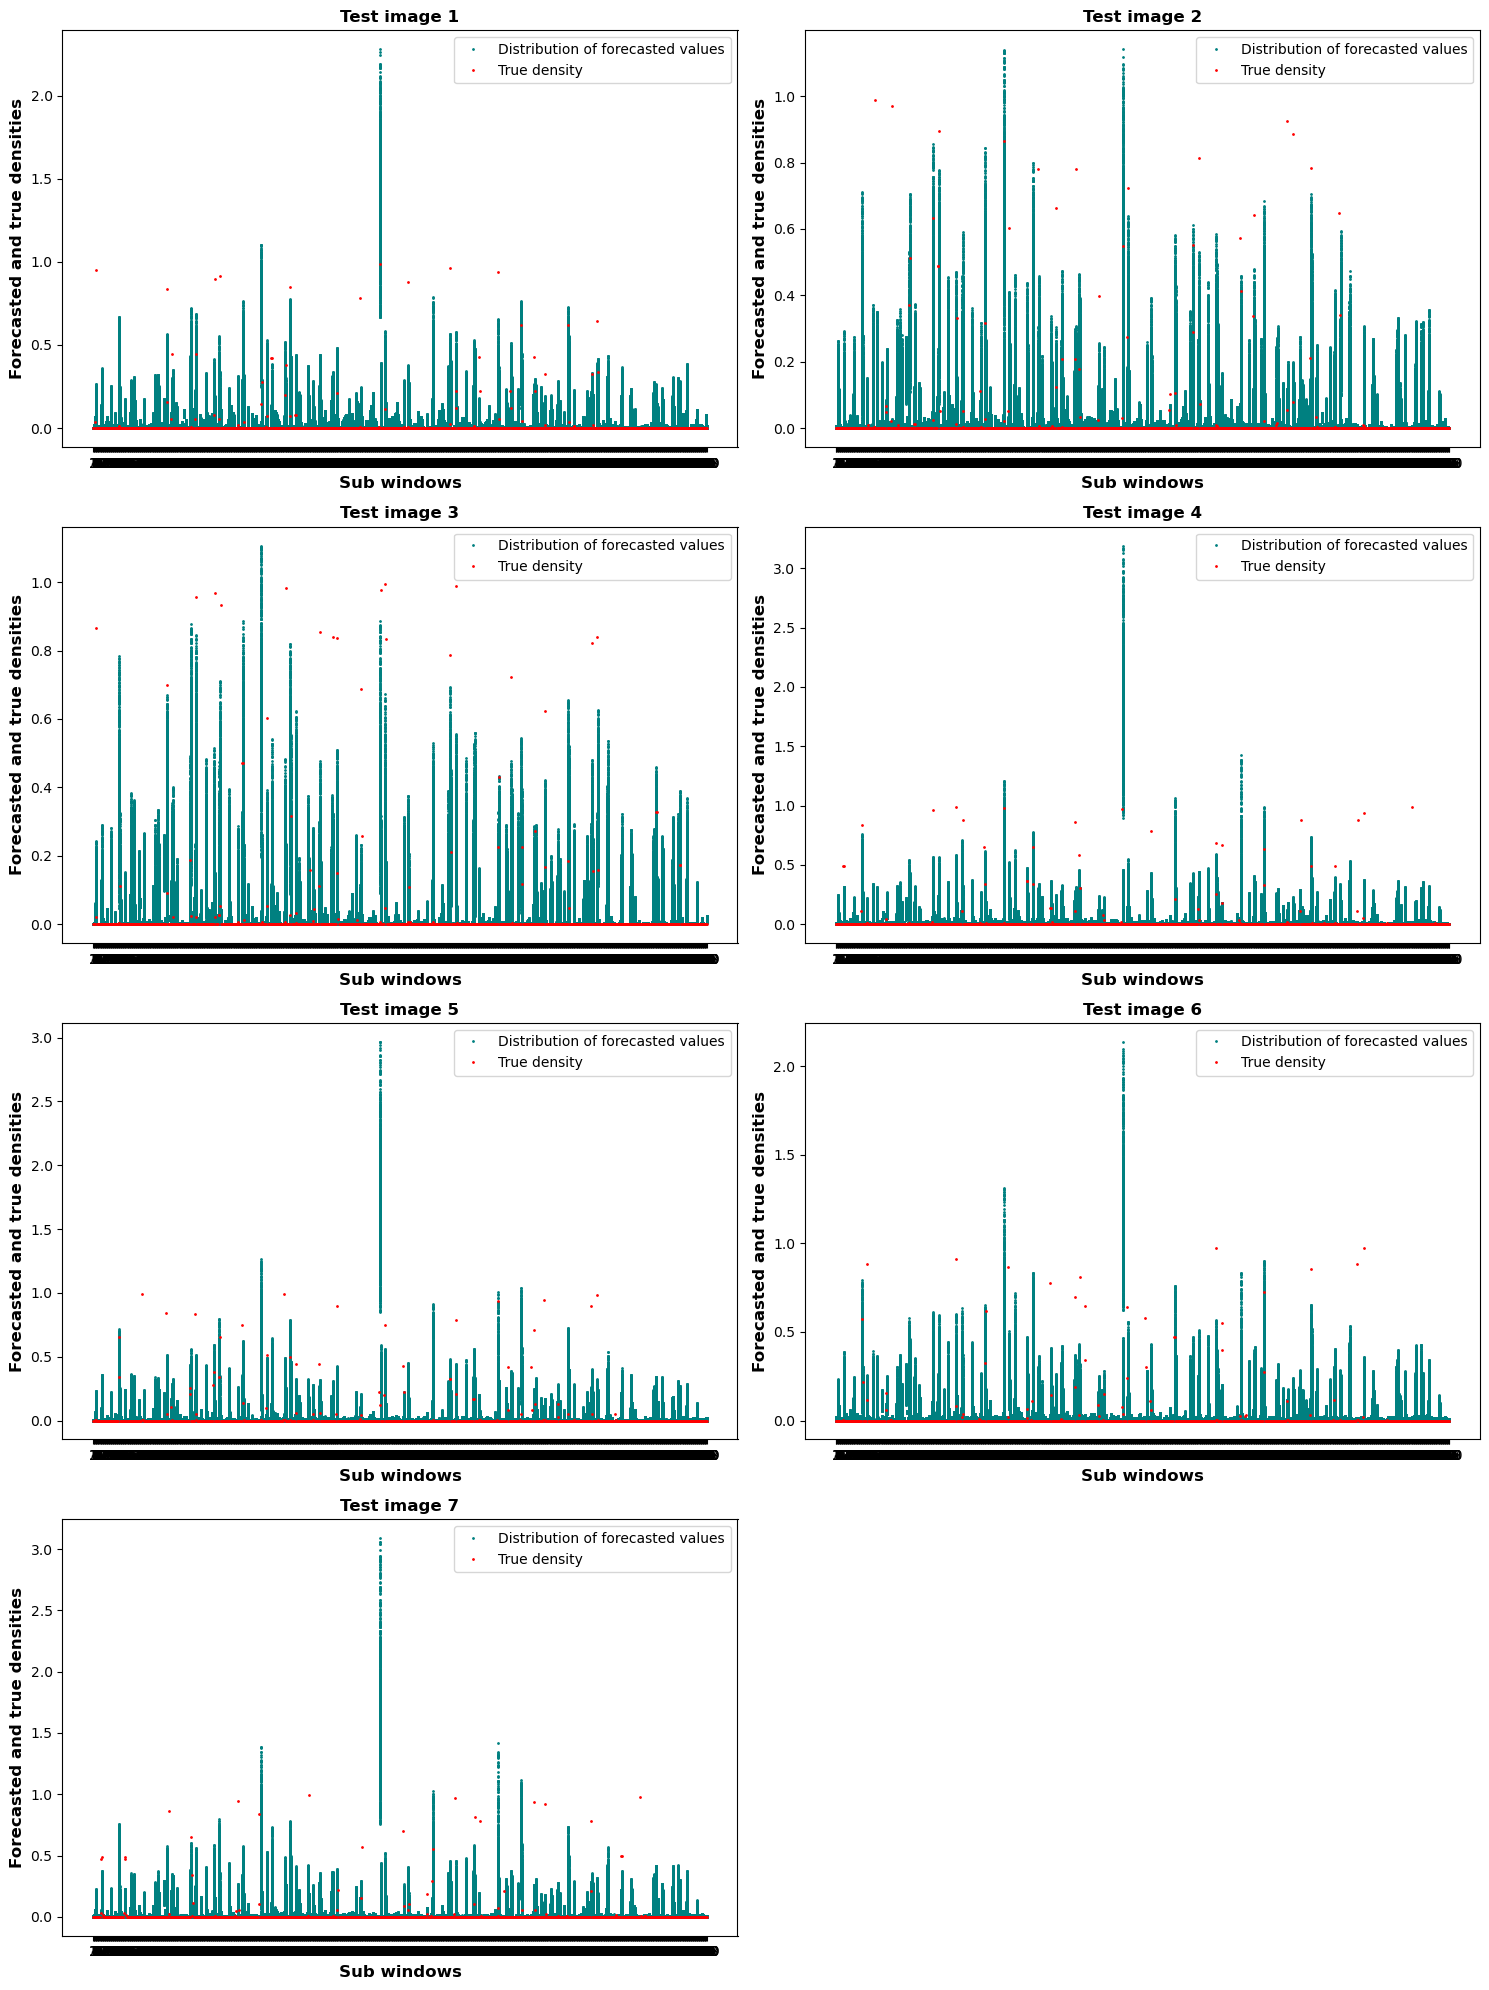

CPU times: user 27.6 s, sys: 826 ms, total: 28.4 s
Wall time: 28.1 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 